# <span style="color:blue">Aprendizaje Automático</span>

## Integrantes:
- Daniel Roman Ramirez
- Obed Ríos-Ruiz

## Aprendizaje Evolutivo

En esta etapa de métodos de aprendizaje automático se estudiará la aplicación de técnicas de **aprendizaje evolutivo** para la solución de problemas de optimización de ruteo, específicamente el *Cumulative Capacited Vehicle Routing Problem* (CCVRP), donde se considera una capacidad constante igual para cada vehículo de despacho y se desea encontrar el conjunto de rutas que minimiza la suma total de tiempos de llegada a cada nodo, los cuales poseen una demanda específica.

### Descripción de problema

El Cumulative Capacited Vehicle Routing Problem (CCVRP) resulta como una variación del Capacited Vehicle Routing Problem (VRP) [[1]](#1), al buscar minimizar la suma de tiempos de llegada de un conjunto de vehículos al atender los clientes de determinada zona bajo restricciones concernientes a la capacidad. Es sabido que especialmente el VRP es uno de los más importantes y estudiados en optimización combinatoria. El CCVRP consta de un conjunto de clientes dispersos en un grafo donde cada uno tiene una demanda y se deben programar rutas para visitar a cada cliente de acuerdo a su posición y demanda. Frente a esto, los enfoques sobre los cuales es posible construir un método de solución son amplios, variando desde métodos constructivos hasta otros de naturaleza más compleja

Sea $V=\{0,1,2,...,n,n+1\}$ el conjunto de nodos, donde los nodos $0$ y $n+1$ son, respectivamente, el punto inicial y final, $V'=\{1,2,...,n\}=V-\{0,n+1\}$ es el conjunto de clientes, $E$ es el conjunto de aristas que conecta cada pareja de nodos y *R* un conjunto de vehículos idénticos con capacidad $Q$. El problema se define en un grafo no dirigido *G*$=$*(V,E)* y a cada arco *(i,j)* se asocia un tiempo de viaje *$c_{ij}$*, donde cada cliente $j\in V'$ tiene una demanda $q_{j}$.

El objetivo del CCVRP es definir un conjunto de rutas de forma que cada una inicie y termine en el punto inicial y final respectivamente, buscando reducir el tiempo entre dichos puntos. Además, se visita cada cliente tan sólo una vez, sin que la demanda total del vehículo recorriendo la respectiva ruta exceda su capacidad, buscando entonces minimizar la suma total de los tiempos de llegada de cada vehículo a sus nodos programados.

Sea $t_{i}^{k}$ el tiempo en que llega el vehículo *k* al cliente *i* desde que parte y sea una variable binaria *$x_{ij}^{k}=1$*, si y sólo si el vehículo $k$ atraviesa el arco $(i,j)$.

La formulación del problema es como sigue [[2]](#2):
\begin{equation}
min \sum_{k\in R} \sum_{i\in V'} t_{i}^{k}
\label{eq:kkk}
\tag{1}
\end{equation}

Sujeto a:
\begin{equation}
\sum_{i\in V}x_{ij}^{k}=\sum_{i\in V}x_{ji}^{k} \hspace{0.5cm} \forall j\in V', k\in R
\tag{2}
\end{equation}

\begin{equation}
\sum_{k\in R}\sum_{j\in V}{x_{ij}^{k}}=1 \hspace{0.5cm} \forall i\in V'
\tag{3}
\end{equation}

\begin{equation}
\sum_{i\in V'}\sum_{j\in V} q_{i}x_{ij}^{k}\le Q \hspace{0.5cm} \forall k\in R
\tag{4}
\end{equation}

\begin{equation}
\sum_{j\in V}x_{0j}^{k}= 1\hspace{0.5cm} \forall k\in R
\tag{5}
\end{equation}

\begin{equation}
\sum_{i\in V}x_{i,n+1}^{k}= 1\hspace{0.5cm} \forall k\in R
\tag{6}
\end{equation}

\begin{equation}
t_{i}^{k}+c_{ij}-(1-x_{ij}^{k})G\leq{t_{j}^{k}}\hspace{0.5cm} \forall i\in V\setminus \{n+1\}, j\in V', k\in R
\tag{7}
\end{equation}

\begin{equation}
t_{i}^{k}\ge 0\hspace{0.5cm} \forall i\in V', k\in R
\tag{8}
\end{equation}

\begin{equation}
x_{ij}^{k}\in \{0,1\}\hspace{0.5cm} \forall i\in V, j\in V, k\in R
\tag{9}
\end{equation}

La función objetivo (1) minimiza la suma de los tiempos de llegada donde los clientes. Las restricciones en (2) son aquellas relacionadas con la conservación del flujo. Las restricciones en (3) establecen que cada *$i\in V'$* es visitado una vez por un único vehículo. En (4) se asegura que la demanda que lleva el vehículo *k* no exceda su capacidad. Las (5) y (6) confirman que cada ruta inicie y termine donde debe hacerlo. (7) dice que si un cliente *j* es atendido después de un cliente *i* por el vehiculo *k* entonces *$t_{j}^{k}$* debe ser mayor o igual que *$t_{i}^{k}$* sumado el tiempo de viaje *$c_{ij}$*, donde *G* denota una constante considerablemente grande. Finalmente las ecuaciones (8) y (9) corresponden a los dominios de las variables de decisión.

Ahora, es de interés tratar el *CCVRP* dado que es un problema altamente complejo con varias aplicaciones reales de gran utilidad tales cómo logística de atención a desastres [[3]](#3).

### Representación de la solución

Las soluciones del problema dadas por los métodos a continuación, están conformadas por dos elementos, una matriz de nodos con $k$ filas y $n+2$ columnas, donde cada fila indica la ruta seguida por su respectivo vehículo y, en segundo lugar, el valor de la función objetivo para cada ruta. En particular, teniendo la matriz de rutas y las posiciones de los nodos, es posible visualizar el conjunto de rutas de los vehículos obtenido bajo un criterio determinado.

### Representación de los individuos

Los individuos (rutas) son representados como arreglos binarios donde $1$ en una determinada posición indica que un vehículo lo visita ó $0$ en el caso contrario.

### Algoritmos evolutivos

Los algoritmos evolutivos se basan principalmente en el comportamiento observado en la evolución biológica de poblaciones en la naturaleza. Esta clase de métodos heurísticos considera un conjunto de individuos o soluciones, cuyas caracteristicas o genes son la semilla para generar nuevos sujetos en el espacio de solución mediante la reproducción entre ellos. Esto se logra mediante la modelación de la selección basada en la población, la reproducción o cruce y la mutación, lo que se traduce en procesos de actualización de la estructura de la población inicial, generada, con frecuencia, aleatoriamente. Dicha población se reproduce y se actualiza, mediante un criterio de selección, en otra cuyos elementos tienden a conformar un conjunto de individuos que posee propiedades o aptitudes deseables, según el problema.

La forma en que dichos procesos son modelados y ejecutados puede varíar de acuerdo a la naturaleza del problema sobre el cual se aplique el algoritmo, permitiendo asi explotar las ventajas y reducir los márgenes de error de este tipo de algoritmos. En este trabajo se procedió a implementar el siguiente algoritmo evolutivo ($E1$):

#### C1 - Base (*Métodos constructivos*)
Los métodos constructivos se orientan a buscar solución al problema tratado secuencialmente mediante cierto criterio (generalmente construído con base a la naturaleza del problema), formando así un procedimiento que inserta a una solución parcial el elemento disponible que mejor se acomode a dicha condición. Para este problema la solución se construye desde una ruta parcial para cada vehículo y se busca iterativamente un nodo $j\in V'$ que se pueda añadir a la ruta y que sea el mejor entre los disponibles.

> En este caso, el criterio tomado en cuenta, denotado como $C1$, es el *vecino más cercano*, en donde en cada iteración un vehículo $k$ con capacidad $Q$ situado en un nodo $i$ visita al próximo nodo no visitado más cercano $j$ mientras su carga hasta visitar $j$ no exceda la capacidad.


#### A1 - Base (*Métodos aleatorios*)
Esta clase de métodos busca incorporar comportamientos aleatorios en la búsqueda de soluciones de un problema. Para los propósitos de esta aplicación, se modificó el método constructivo **C1**, adicionando un componente aleatorio a la hora de insertar un elemento en la solución parcial de la siguente manera: en cada paso de la construcción de la solución, se agrega un nodo $j$ al final de la ruta parcial, el cual es elegido aleatoriamente de una lista que contiene un conjunto de nodos cercanos al nodo que esté al final de dicha ruta parcial. Esto, si la carga hasta visitar el nodo $j$ no excede la capacidad. 

> Dicho proceso se realiza un número de veces determinado por el usuario, al igual que el número de nodos cercanos considerados en cada paso. Este método es denotado como **A1**.

#### E1
Este algoritmo considera dos conjuntos de soluciones iniciales diferentes generadas independientemente mediante la unión de dos tipos de soluciones aleatorias, una parte construida con **A1** y la otra mediante la generación y traducción a rutas de valores pseudoaleatorios uniformemente distribuidos. En cada población se selecciona un par de individuos por ruleta y posteriormente se cruzan. Por un lado, en la población *1* se selecciona aleatoriamente un punto por donde dividir el cromosoma de los padres, de forma que los hijos resultan del intercambio de información entre ellos, más especificamente, del punto hacia la izquierda contendrá los nodos del padre con peor función objetivo y el resto del otro, ello con la intención de generar variedad genética en la población descendiente. Por otro lado, en la población *2*, se crea el hijo en base a un vector binario aleatorio donde los $1$ indican un nodo proveniente del primer padre y los $0$ del segundo. La mutación en ambas poblaciones se rige por una probabilidad, el procedimiento aplicado es modificar dos o un gen aleatoriamente sobre el hijo generado para la población *1* o *2*, respectivamente. La actualización de cada población es mediante la selección en orden descendente de los mejores individuos entre la población actual y la recién procreada.

Posterior a esta actualización interactuan los dos conjuntos de poblaciones mediante la selección e inserción aleatoria de sujetos de una en otra; por otro lado, si no se han encontrado soluciones mejores durante un número determinado de generaciones, respecto a un porcentaje del número total de generaciones entonces se renuevan algunos individuos reemplazandolos por otros creados a partir de **A1**. Todo este procedimiento se repite tanto como un número fijo de generaciones, además, en el caso en que se presenten soluciones infactibles se usa un factor de penalización en la función objetivo dependiendo de cuán lejos está de ser factible. Finalmente, a la mejor solución obtenida entre las dos poblaciones se aplica el algoritmo *R1* para refinar con la obtención del óptimo en su vecindad.

### Experimentos computacionales

#### Implementación e instancias

Se han tomado como referencia los resultados presentados en  [[4]](#4) para realizar un análisis comparativo entre soluciones ya conocidas para algunas de las instancias y aquellas entregadas por los algoritmos propuestos. La solución para cada conjunto de información se obtiene seleccionando la mejor instancia dado un trío de soluciones parciales para cada uno. Los resultados más significativos son resumidos en la tabla a continuación, donde los títulos de las columnas son: nombre de la instancia, número de nodos ($n$), número de vehiculos disponibles ($k$), la mejor solución obtenida hasta ahora según [[4]](#4) ($BKS$), la cual es dada en segundos y el mejor valor de la función objetivo ($Best$) así cómo su promedio ($Avg.$) de acuerdo al número de ejecuciones.

Los resultados obtenidos también son dados en segundos y se agrega la columna $Error$ $abs$ como la diferencia absoluta entre el referente de la literatura y el mejor resultado obtenido en el procedimiento propio

#### Criterios

Para la ejecución del algoritmo *E1* se han preestablecido sus parámetros, así se fijó el número de generaciones en $5000$ para la librería tomada de [[5]](#5) y en $500$ para la librería tomada de [[6]](#6), y la cantidad de hijos a crear en $50$. Respecto al aporte de **A1** a la construcción de las poblaciones iniciales se estableció en $10$ (cuya longitud del conjunto de nodos a tener en cuenta fue $2$ con $50$ iteraciones) y otras $70$ mediante valores aleatorios. Las probabilidades de mutación fueron $0.8$ y $0.7$ para la población *1* y *2* correspondientemente. Si no se presentan cambios en la mejor solución obtenida a medida que transcurren las generaciones al menos en el $5\%$ de la cantidad fija entonces se renova la población en $10$ de sus individuos después del primero, que contiene la mejor solución de la(s) población(es).

Todos los parámetros indicados representan dependencia entre criterios de parada, siendo el principal el número de generaciones como $5000$.

### Resultados

En la tabla a continuación puede verse como, si bien los errores absolutos entre las soluciones encontradas y aquellas en la literatura son relativamente altos, no se presentan en todos los casos. Puede observarse, por ejemplo, como en $CMT01$, $CMT02$, $CMT03$, $GWKC17$ se alcanzan valores muy cercanos a los óptimos.

Es de tener en cuenta que la calidad de las soluciones son fuertemente influenciadas por la cantidad de iteraciones y la definición de los diferentes componentes que interactúan con el meta-heurístico, siendo algunos de ellos aleatorios en su búsqueda, por lo que sería interesante explorar como anexar comportamientos mejor asociados con el problema que se estudia para programarlos en el método.

|            	|     	|    	|           	|   Evolutivos  	|               	|         	|           	|
|:----------:	|:---:	|:--:	|:---------:	|:-------------:	|:-------------:	|:-------:	|-----------	|
| Instancias 	|  n  	|  k 	|    BKS    	|      E1       	|        E1       	|   E1      	|      E1     	|
|            	|     	|    	|           	| **Best** 	| **Avg.** 	|   **Time**  	| **Error abs** 	|
|    CMT01   	|  50 	|  5 	|  2230,35  	|    2373,40    	|    2530,24    	|  190,46 	| 143,05    	|
|    CMT02   	|  75 	| 10 	|  2391,63  	|    3040,33    	|    3182,71    	|  284,77 	| 648,7     	|
|    CMT03   	| 100 	|  8 	|  4045,41  	|    4648,09    	|    4977,57    	|  497,07 	| 602,68    	|
|    CMT04   	| 150 	| 12 	|  4987,51  	|    5878,50    	|    6385,58    	| 1181,53 	| 890,99    	|
|    CMT05   	| 199 	| 17 	|  5809,59  	|    8272,83    	|    8377,44    	| 2091,15 	| 2463,24   	|
|    CMT11   	| 120 	|  7 	|  7314,55  	|    8554,92    	|    8926,99    	|  701,33 	| 1240,37   	|
|    CMT12   	| 100 	| 10 	|  3558,92  	|    4376,26    	|    4455,84    	|  489,54 	| 817,34    	|
|   GWKC01   	| 240 	|  9 	|  54786,92 	|    77834,09   	|    78912,34   	|  489,58 	| 23047,17  	|
|   GWKC02   	| 320 	| 10 	| 100621,30 	|   149837,13   	|   151377,72   	|  672,83 	| 49215,83  	|
|   GWKC03   	| 400 	| 10 	| 171027,05 	|   234992,88   	|   257622,06   	|  520,90 	| 63965,83  	|
|   GWKC04   	| 480 	| 10 	| 262049,31 	|   381173,97   	|   384530,78   	|  991,39 	| 119124,66 	|
|   GWKC05   	| 200 	|  5 	| 114163,52 	|   156386,31   	|   157857,17   	|  311,99 	| 42222,79  	|
|   GWKC06   	| 280 	|  7 	| 140429,95 	|   204952,14   	|   207461,09   	|  493,85 	| 64522,19  	|
|   GWKC07   	| 360 	|  8 	| 180481,56 	|   248826,19   	|   251719,95   	|  652,94 	| 68344,63  	|
|   GWKC08   	| 440 	| 10 	| 194100,64 	|   281593,91   	|   282651,88   	|  856,71 	| 87493,27  	|
|   GWKC09   	| 255 	| 14 	|  4725,58  	|    6890,08    	|    6998,45    	|  356,10 	| 2164,5    	|
|   GWKC10   	| 323 	| 16 	|  6713,92  	|    10353,41   	|    10425,75   	|  478,77 	| 3639,49   	|
|   GWKC11   	| 399 	| 18 	|  9214,07  	|    14463,43   	|    14694,83   	|  697,66 	| 5249,36   	|
|   GWKC12   	| 483 	| 19 	|  12526,17 	|    19789,41   	|    19995,11   	|  815,38 	| 7263,24   	|
|   GWKC13   	| 252 	| 26 	|  3628,30  	|    5195,09    	|    5243,28    	|  378,79 	| 1566,79   	|
|   GWKC14   	| 320 	| 29 	|  5216,80  	|    7567,56    	|    8190,24    	|  493,89 	| 2350,76   	|
|   GWKC15   	| 396 	| 33 	|  7010,41  	|    10515,65   	|    10532,57   	|  677,68 	| 3505,24   	|
|   GWKC16   	| 480 	| 37 	|  9250,98  	|    13934,96   	|    14048,50   	|  890,44 	| 4683,98   	|
|   GWKC17   	| 240 	| 22 	|  3065,46  	|    3986,32    	|    4008,22    	|  365,45 	| 920,86    	|
|   GWKC18   	| 300 	| 27 	|  4221,14  	|    5605,98    	|    5673,04    	|  488,92 	| 1384,84   	|
|   GWKC19   	| 360 	| 33 	|  5523,38  	|    7589,22    	|    7688,86    	|  649,01 	| 2065,84   	|
|   GWKC20   	| 420 	| 38 	|  7223,08  	|    10122,72   	|    10275,44   	|  817,58 	| 2899,64   	|

En la Figura a continuación se han representado las rutas encontradas para las instancias $GWKC_{01}$, $CMT_{01}$ y $GWKC_{17}$ bajo el criterio **E1** y cuyas especificaciones pueden consultarse en las tablas a continuación. La selección de dichas instancias se ha debido a que estas representan las estructuras espaciales que más se manifiestan en las respectivas librerías.

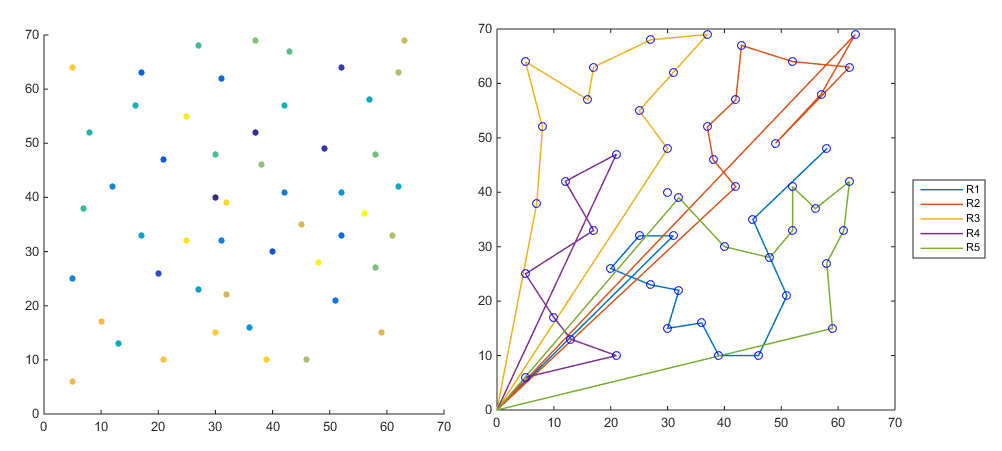

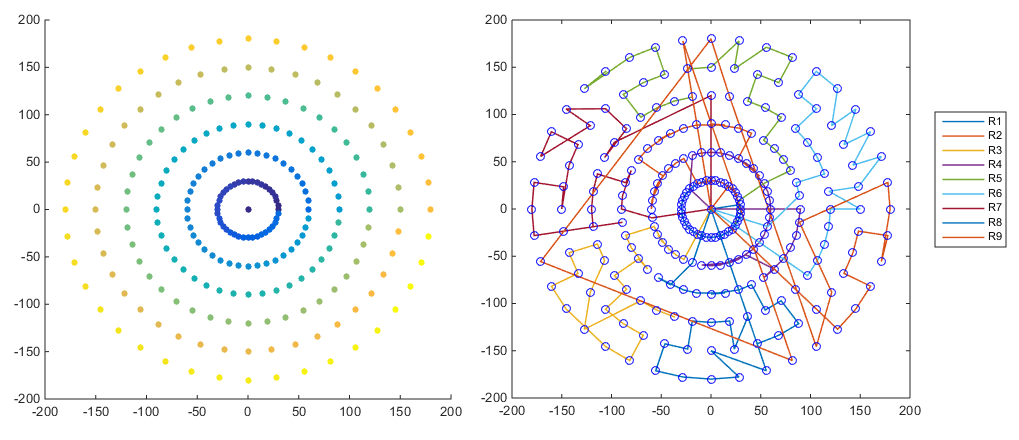

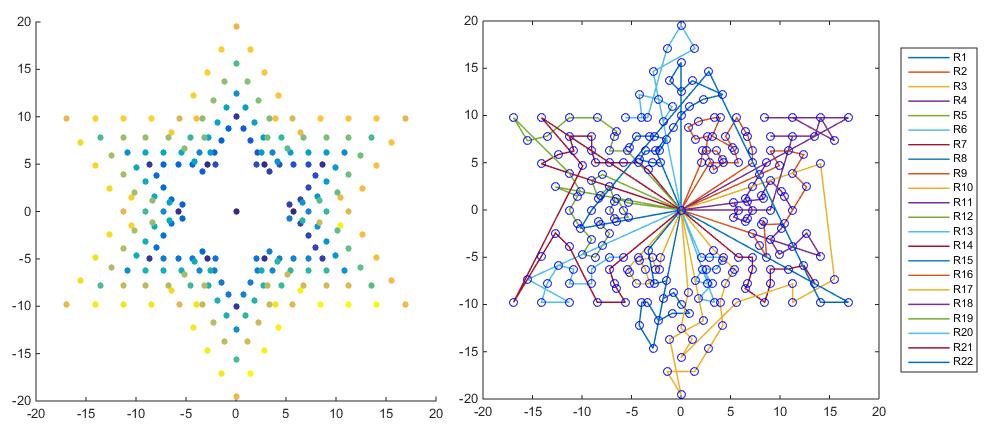

### Análisis de sensibilidad

Respecto al parámetro de mayor relevancia $gen$ se hizo un análisis de sensibilidad para evaluar la respuesta del método $E1$ sobre la instancia $CMT01$.

Las condiciones de la simnulación se preservan variando $gen$ entre $100$ y $10.000$ en pasos de $50$, así pues se obtiene

| Iteración 	| Parámetro 	|   Valor   	| Cota 	|
|:---------:	|:---------:	|:---------:	|:----:	|
|    172    	|    8650   	| 2392.6317 	|  Min 	|
|     3     	|    250    	| 2862.0468 	|  Max 	|

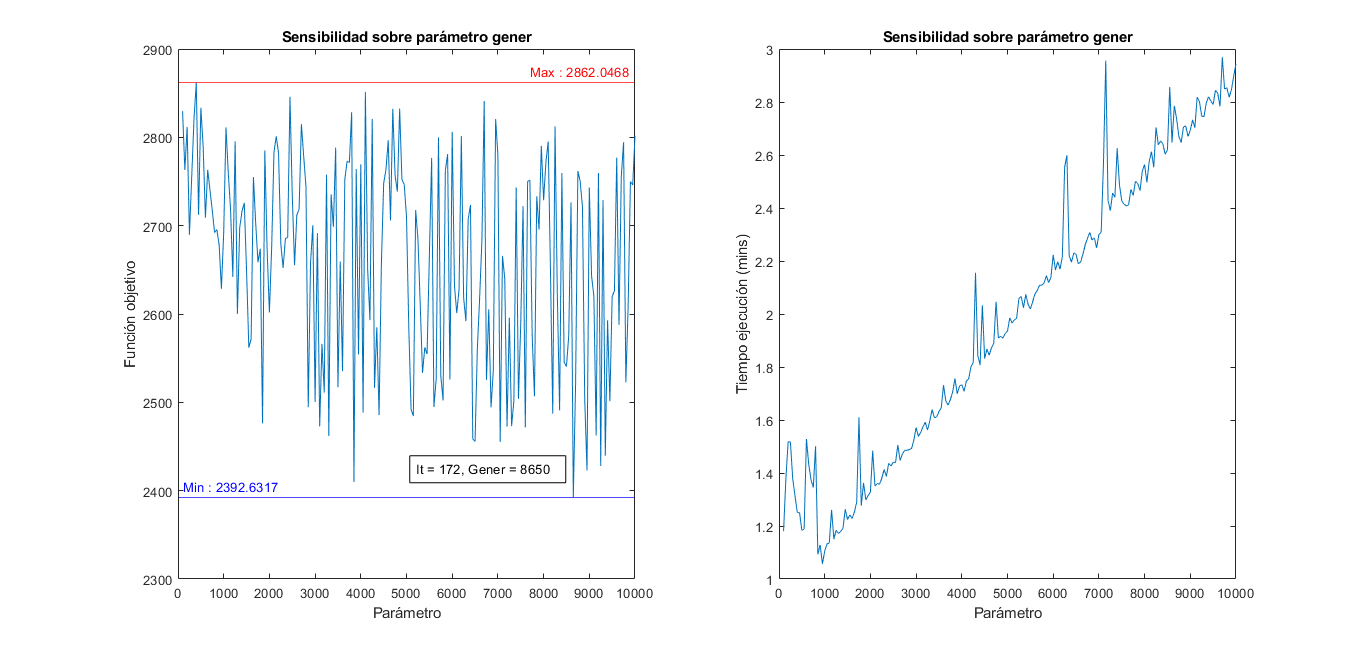

Observese que el mínimo obtenido requirió un parámetro superior al impuesto inicialmente para la simulación en la primer tabla (de $5000$). Adicionalmente, el tiempo de computación aumenta de forma sustancial a medida que aumenta el parámetro, lo que podría reducirse, no obstante, disponinendo de mayor capacidad computacional.

Es de esperarse que a medida que se incremente el valor del parámetro se encuentren soluciones que alcancen, inclusive, el óptimo presentado en la literatura; sin embargo, no es posible asegurar que siempre se alcanzarán valores mínimos, ello dado la aleatoriedad de las poblaciones iniciales con que se ejecuta el método. Lo que sí se puede asegurar es que las soluciones a medida que aumenta el valor del parámetro se mantienen en rangos menores cada vez más y este comportamiento facilitaría entonces crear intervalos entre los cuales el $gener$ debería moverse.

### References
<a id="1">[1]</a> 
G. M. Ribeiro and G. Laporte, “An adaptive large neighborhood search heuristic for the cumulative capacitated vehicle routing problem,” Computers Operations Research, vol. 39, no. 3, pp. 728 – 735, 2012.

<a id="2">[2]</a> 
S. U. Ngueveu, C. Prins, and R. W. Calvo, “An effective memetic algorithm for the cumulative capacitated vehicle routing problem,” Computers Operations Research, vol. 37, no. 11, pp. 1877 – 1885, 2010. Metaheuristics for Logistics and Vehicle Routing.

<a id="3">[3]</a> 
J. Lysgaard and S. Wøhlk, “A branch-and-cut-and-price algorithm for the cumulative capacitated vehicle routing problem,” European Journal of Operational Research, vol. 236, no. 3, pp. 800 – 810, 2014. Vehicle Routing and Distribution Logistics.


<a id="4">[4]</a>
J. Rivera, H. Afsar, and C. Prins, “A multistart iterated local search forthe multitrip cumulative capacitated vehicle routing problem,”Compu-tational Optimization and Applications, vol. 61, no. 1, pp. 159–187, 2015.

<a id="5">[5]</a>
N. Christofides, Combinatorial optimization. A Wiley-Interscience publication,
John Wiley & Sons Canada, Limited, pp. 315—338, 1979.

<a id="6">[6]</a>
G. Bruce, W. Edward, K. James, and C. I-Ming, “Metaheuristics in vehicle
routing,” in Fleet Management and Logistics (C. T. G. and L. Gilbert,
eds.), Springer US, 1998.